# Imports

In [42]:
import sys
sys.path.append('/home/mprasha/D2D_Mridu_Sym_Link')
import torch
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.manifold import TSNE

# Create seed constant

In [81]:
import random
seed = 10000

# Visualize AffectEcho's clustered results

### Get all data from results.npy

In [82]:
data = np.load("/home/mprasha/D2D_Mridu_Sym_Link/Results/results.npy",allow_pickle=True)

### About `data`
* Shape: (25, 64)
* Each row is an embedding. 
* Embeddings 1-5 are encoded angry, embeddings 6-10 are happy, embeddings 11-15 are neutral, embeddings 15-20 are sad, embeddings 20-25 are surprised.

### Create t-SNE model, downsample, plot

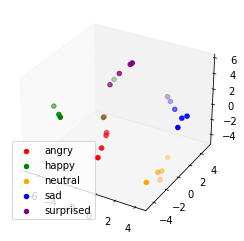

In [83]:
m = TSNE(learning_rate=0.01, n_components=3, perplexity=2, random_state=seed)

# -------- downsample 64 dims to 3 dims for each embedding

data_3d = torch.zeros((25, 3)).numpy()
data_3d = m.fit_transform(data)

# -------- plot

# try to scale down the plot size for aesthetics
# add labels
# remove graph grid

fig = plt.figure()
ax = plt.axes(projection="3d")
ax. grid(False)

# scatter plot
ax.scatter3D(data_3d[0:5, 0],
             data_3d[0:5, 1], 
             data_3d[0:5, 2], c="red", s=20, label="angry") # angry
ax.scatter3D(data_3d[5:10, 0], 
             data_3d[5:10, 1], 
             data_3d[5:10, 2], c="green", s=20, label="happy") # happy
ax.scatter3D(data_3d[10:15, 0], 
             data_3d[10:15, 1], 
             data_3d[10:15, 2], c="orange", s=20, label="neutral") # neutral
ax.scatter3D(data_3d[15:20, 0], 
             data_3d[15:20, 1], 
             data_3d[15:20, 2], c="blue", s=20, label="sad") # sad
ax.scatter3D(data_3d[20:25, 0], 
             data_3d[20:25, 1], 
             data_3d[20:25, 2], c="purple", s=20, label="surprised") # surprised
plt.legend(loc ="lower left")
plt.savefig('/home/mprasha/D2D_Mridu_Sym_Link/Results/results.png', dpi=500)

plt.show()

# Visualize AffectEcho's unclustered results

### Get all data from results_without_clustering.npy

In [46]:
data = np.load("/home/mprasha/D2D_Mridu_Sym_Link/Results/results_without_clustering.npy",allow_pickle=True).item()

### About `data`
* Dictionary with keys 0, 4, 5, 6, 7.
* `data[key]` is a 2-dimensional list
* `data[0]` has 6000 embeddings encoded angry, `data[4]` has 6000 happy embeddings, `data[5]` has 6000 neutral embeddings, `data[6]` has 6000 sad embeddings, `data[7]` has 6000 surprised embeddings.
* Each embedding has 64 dimensions

### Sampling

There are 6000 embeddings per emotion. We randomly sample 20 per emotion.

In [79]:
# -------- convert lists to numpy

data[0] = np.array(data[0])
data[4] = np.array(data[4])
data[5] = np.array(data[5])
data[6] = np.array(data[6])
data[7] = np.array(data[7])

# -------- sampling

random.seed(seed)

x_0_i = np.random.choice(6000, 20)
x_4_i = np.random.choice(6000, 20)
x_5_i = np.random.choice(6000, 20)
x_6_i = np.random.choice(6000, 20)
x_7_i = np.random.choice(6000, 20)

x_0 = data[0][x_0_i]
x_4 = data[4][x_4_i]
x_5 = data[5][x_5_i]
x_6 = data[6][x_6_i]
x_7 = data[7][x_7_i]

# -------- combine all 5 meads into numpy of shape (100, 64)

data_sample = np.concatenate((x_0,
                        x_4,
                        x_5,
                        x_6,
                        x_7))
print(data_sample.shape)

(100, 64)


### Create t-SNE model, downsample, plot

(100, 3)


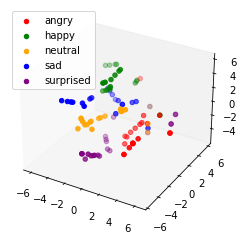

In [80]:
m = TSNE(learning_rate=0.01, n_components=3, perplexity=2, random_state=23)

# -------- 64 dims to 3 dims

data_3d = torch.zeros((100, 3)).numpy()
data_3d = m.fit_transform(data_sample)
print(data_3d.shape)

# -------- plot

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.grid(False)

# scatter plot
ax.scatter3D(data_3d[0:20, 0],
             data_3d[0:20, 1], 
             data_3d[0:20, 2], c="red", s=20, label="angry") # angry
ax.scatter3D(data_3d[20:40, 0], 
             data_3d[20:40, 1], 
             data_3d[20:40, 2], c="green", s=20, label="happy") # happy
ax.scatter3D(data_3d[40:60, 0], 
             data_3d[40:60, 1], 
             data_3d[40:60, 2], c="orange", s=20, label="neutral") # neutral
ax.scatter3D(data_3d[60:80, 0], 
             data_3d[60:80, 1], 
             data_3d[60:80, 2], c="blue", s=20, label="sad") # sad
ax.scatter3D(data_3d[80:100, 0], 
             data_3d[80:100, 1], 
             data_3d[80:100, 2], c="purple", s=20, label="surprised") # surprised
plt.legend()
plt.savefig('/home/mprasha/D2D_Mridu_Sym_Link/Results/results_without_clustering.png', dpi=500)
plt.show()

# Visualize timnet

### Get all data from timnet_results.npy

In [8]:
data = np.load("/home/mprasha/D2D_Mridu_Sym_Link/Results/timnet_results.npy",allow_pickle=True).item()
x_source = data["x"]
y_source = data["y"]

# -------- testing

print("y_source[19810:19815]: ", y_source[0:2], "\n")
print(x_source.shape)
print(type(data))

y_source[19810:19815]:  [[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]] 

(21773, 196, 39)
<class 'dict'>


### About `x_source`

### About `y_source`

### Sampling

There are 1000s of embeddings per emotion. We randomly sample 5 per emotion.

In [14]:
# -------- random number generator (coming soon)

# -------- get 8 numpy pairs x_i, y_i where i:0,7, each with 5 embeddings

mbds_per_mead = 5 #mbds = embeddings
graph_dims = 3

"""
# from x_test and y_test

x_0 = x_source[20000:20005]
x_1 = x_source[21400:21405]
x_2 = x_source[21000:21005]
x_3 = x_source[21500:21505]
x_4 = x_source[21600:21605]
x_5 = x_source[19810:19815]
x_6 = x_source[21700:21705]
x_7 = x_source[21300:21305]

y_0 = y_source[20000:20005]
y_1 = y_source[21400:21405]
y_2 = y_source[21000:21005]
y_3 = y_source[21500:21505]
y_4 = y_source[21600:21605]
y_5 = y_source[19810:19815]
y_6 = y_source[21700:21705]
y_7 = y_source[21300:21305]
"""

# from x_train and y_train (mostly lol)

x_0 = x_source[10000:10005]
x_1 = x_source[6000:6005]
x_2 = x_source[21000:21005]
x_3 = x_source[2000:2005]
x_4 = x_source[8000:8005]
x_5 = x_source[19810:19815]
x_6 = x_source[4000:4005]
x_7 = x_source[15000:15005]

y_0 = y_source[10000:10005]
y_1 = y_source[6000:6005]
y_2 = y_source[21000:21005]
y_3 = y_source[2000:2005]
y_4 = y_source[8000:8005]
y_5 = y_source[19810:19815]
y_6 = y_source[4000:4005]
y_7 = y_source[15000:15005]

print((x_0))

[[[-2.88929871e+02  1.63602768e+02  1.82530022e+01 ...  3.73123217e+00
   -2.34063506e+00 -7.50260544e+00]
  [-1.77986557e+02  1.47503494e+02  9.93110847e+00 ...  6.35263109e+00
    6.02966833e+00 -8.15404892e+00]
  [-1.31664490e+02  1.31484619e+02  4.69288445e+00 ...  1.13197594e+01
    1.00407810e+01 -3.40549970e+00]
  ...
  [-2.70042206e+02  1.44882690e+02 -1.51913443e+01 ... -6.04706407e-02
   -5.64913130e+00  4.83053637e+00]
  [-2.72789307e+02  1.38668915e+02 -1.06956377e+01 ... -1.27355844e-01
   -1.38250339e+00  8.64558029e+00]
  [-2.85819733e+02  1.29254257e+02 -6.60836029e+00 ...  2.29501414e+00
    1.85260773e-02  4.11529255e+00]]

 [[-5.30148926e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-5.30148926e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-5.30148926e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [-4.32619354e+02  3.7

### Create t-SNE model, downsample, plot

(40, 196)
(40, 3)


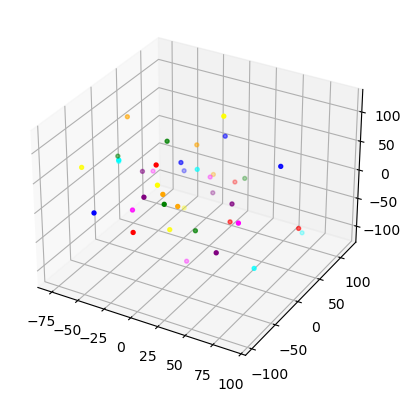

In [15]:
%timeit

# -------- create t-SNE model, 10 < learning rate < 100 typically

m_1 = TSNE(learning_rate="auto", n_components=1)

# -------- reduce 39 dims into 1 dim for all 40 tensors

# mead 0
x_0_t = torch.ones((5, 196, 1)).numpy()
x_0_t[0] = m_1.fit_transform(x_0[0])
x_0_t[1] = m_1.fit_transform(x_0[1])
x_0_t[2] = m_1.fit_transform(x_0[2])
x_0_t[3] = m_1.fit_transform(x_0[3])
x_0_t[4] = m_1.fit_transform(x_0[4])

# mead 1
x_1_t = torch.ones((5, 196, 1)).numpy()
x_1_t[0] = m_1.fit_transform(x_1[0])
x_1_t[1] = m_1.fit_transform(x_1[1])
x_1_t[2] = m_1.fit_transform(x_1[2])
x_1_t[3] = m_1.fit_transform(x_1[3])
x_1_t[4] = m_1.fit_transform(x_1[4])

# mead 2
x_2_t = torch.ones((5, 196, 1)).numpy()
x_2_t[0] = m_1.fit_transform(x_2[0])
x_2_t[1] = m_1.fit_transform(x_2[1])
x_2_t[2] = m_1.fit_transform(x_2[2])
x_2_t[3] = m_1.fit_transform(x_2[3])
x_2_t[4] = m_1.fit_transform(x_2[4])

# mead 3
x_3_t = torch.ones((5, 196, 1)).numpy()
x_3_t[0] = m_1.fit_transform(x_3[0])
x_3_t[1] = m_1.fit_transform(x_3[1])
x_3_t[2] = m_1.fit_transform(x_3[2])
x_3_t[3] = m_1.fit_transform(x_3[3])
x_3_t[4] = m_1.fit_transform(x_3[4])

# mead 4
x_4_t = torch.ones((5, 196, 1)).numpy()
x_4_t[0] = m_1.fit_transform(x_4[0])
x_4_t[1] = m_1.fit_transform(x_4[1])
x_4_t[2] = m_1.fit_transform(x_4[2])
x_4_t[3] = m_1.fit_transform(x_4[3])
x_4_t[4] = m_1.fit_transform(x_4[4])

# mead 5
x_5_t = torch.ones((5, 196, 1)).numpy()
x_5_t[0] = m_1.fit_transform(x_5[0])
x_5_t[1] = m_1.fit_transform(x_5[1])
x_5_t[2] = m_1.fit_transform(x_5[2])
x_5_t[3] = m_1.fit_transform(x_5[3])
x_5_t[4] = m_1.fit_transform(x_5[4])

# mead 6
x_6_t = torch.ones((5, 196, 1)).numpy()
x_6_t[0] = m_1.fit_transform(x_6[0])
x_6_t[1] = m_1.fit_transform(x_6[1])
x_6_t[2] = m_1.fit_transform(x_6[2])
x_6_t[3] = m_1.fit_transform(x_6[3])
x_6_t[4] = m_1.fit_transform(x_6[4])

# mead 7
x_7_t = torch.ones((5, 196, 1)).numpy()
x_7_t[0] = m_1.fit_transform(x_7[0])
x_7_t[1] = m_1.fit_transform(x_7[1])
x_7_t[2] = m_1.fit_transform(x_7[2])
x_7_t[3] = m_1.fit_transform(x_7[3])
x_7_t[4] = m_1.fit_transform(x_7[4])

# -------- transform tensor from (5, 196, 1) to (5, 196)

x_0_t = np.reshape(x_0_t, (5, 196))
x_1_t = np.reshape(x_1_t, (5, 196))
x_2_t = np.reshape(x_2_t, (5, 196))
x_3_t = np.reshape(x_3_t, (5, 196))
x_4_t = np.reshape(x_4_t, (5, 196))
x_5_t = np.reshape(x_5_t, (5, 196))
x_6_t = np.reshape(x_6_t, (5, 196))
x_7_t = np.reshape(x_7_t, (5, 196))

# -------- combine all meads into numpy of shape (40, 196)

x_train = np.concatenate((x_0_t,
                        x_1_t,
                        x_2_t,
                        x_3_t,
                        x_4_t,
                        x_5_t,
                        x_6_t,
                        x_7_t))
print(x_train.shape)

# -------- reduce 196 dims into 3 dims

m_2 = TSNE(learning_rate="auto", n_components=3, perplexity=4)
x_train_3d = m_2.fit_transform(x_train)
print(x_train_3d.shape)

# -------- plot the x_i, y_i (actual)

# Creating an empty figure
# or plot
fig = plt.figure()
 
# Defining the axes as a
# 3D axes so that we can plot 3D
# data into it.
ax = plt.axes(projection="3d")

# scatter plot
ax.scatter3D(x_train_3d[0:5, 0],
             x_train_3d[0:5, 1], 
             x_train_3d[0:5, 2], c="blue", s=8) # angry
ax.scatter3D(x_train_3d[5:10, 0], 
             x_train_3d[5:10, 1], 
             x_train_3d[5:10, 2], c="red", s=8) # contempt
ax.scatter3D(x_train_3d[10:15, 0], 
             x_train_3d[10:15, 1], 
             x_train_3d[10:15, 2], c="green", s=8) #disgusted
ax.scatter3D(x_train_3d[15:20, 0], 
             x_train_3d[15:20, 1], 
             x_train_3d[15:20, 2], c="orange", s=8) #fear
ax.scatter3D(x_train_3d[20:25, 0], 
             x_train_3d[20:25, 1], 
             x_train_3d[20:25, 2], c="purple", s=8) #happy
ax.scatter3D(x_train_3d[25:30, 0], 
             x_train_3d[25:30, 1], 
             x_train_3d[25:30, 2], c="yellow", s=8) #neutral
ax.scatter3D(x_train_3d[30:35, 0], 
             x_train_3d[30:35, 1], 
             x_train_3d[30:35, 2], c="cyan", s=8) #sad
ax.scatter3D(x_train_3d[35:40, 0], 
             x_train_3d[35:40, 1], 
             x_train_3d[35:40, 2], c="magenta", s=8) #surprised
 
# Showing the above plot
plt.show()

### Create AutoEncoder model, downsample, plot

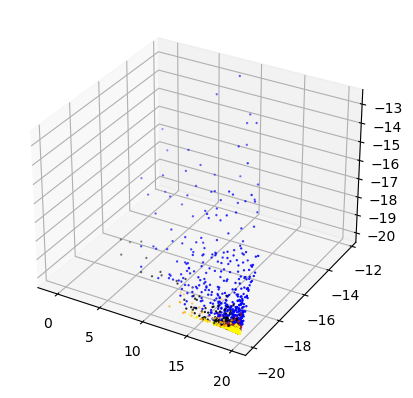

In [7]:
# -------- encode each of the 8 x_i tensors to 3 dims, using autoencoder

Encoder = encoder()

x_0_reduced = torch.zeros((mbds_per_mead,196,graph_dims)).cuda()
x_1_reduced = torch.zeros((mbds_per_mead,196,graph_dims)).cuda()
x_2_reduced = torch.zeros((mbds_per_mead,196,graph_dims)).cuda()
x_3_reduced = torch.zeros((mbds_per_mead,196,graph_dims)).cuda()
x_4_reduced = torch.zeros((mbds_per_mead,196,graph_dims)).cuda()
x_5_reduced = torch.zeros((mbds_per_mead,196,graph_dims)).cuda()
x_6_reduced = torch.zeros((mbds_per_mead,196,graph_dims)).cuda()
x_7_reduced = torch.zeros((mbds_per_mead,196,graph_dims)).cuda()

for i in range(len(x_0)): # len(x_0) = 5
    x_0_reduced[i] = Encoder.forward(x_0[i].detach().cpu()).cuda()
    x_1_reduced[i] = Encoder.forward(x_1[i].detach().cpu()).cuda()
    x_2_reduced[i] = Encoder.forward(x_2[i].detach().cpu()).cuda()
    x_3_reduced[i] = Encoder.forward(x_3[i].detach().cpu()).cuda()
    x_4_reduced[i] = Encoder.forward(x_4[i].detach().cpu()).cuda()
    x_5_reduced[i] = Encoder.forward(x_5[i].detach().cpu()).cuda()
    x_6_reduced[i] = Encoder.forward(x_6[i].detach().cpu()).cuda()
    x_7_reduced[i] = Encoder.forward(x_7[i].detach().cpu()).cuda()

# -------- printing to check type, dims


#print("type(x_0_reduced): ", type(x_0_reduced), "\n")
#print("type(y_0): ", type(y_0), "\n")

#print("x_2_reduced: ", x_2_reduced, "\n")
#print("x_2: ", x_2, "\n")
#print("y_2: ", y_2, "\n")

#print("x_0_reduced.shape: ", x_0_reduced.shape, "\n")
#print("y_0.shape: ", y_0.shape, "\n")


# -------- find x, y, z coordinates for each of the 40 embeddings
# note: for any embedding, all 196 rows are the same!
# note 2: the encoder outputs a different encoding each time!

# mead 0
xs_0 = x_0_reduced[:, :, 0].detach().cpu().numpy() # [all embeddings, first of the 196, x]
tf.reshape(xs_0, [-1])
ys_0 = x_0_reduced[:, :, 1].detach().cpu().numpy() # [all embeddings, first of the 196, y]
tf.reshape(ys_0, [-1])
zs_0 = x_0_reduced[:, :, 2].detach().cpu().numpy() # [all embeddings, first of the 196, z]
tf.reshape(zs_0, [-1])

# mead 1
xs_1 = x_1_reduced[:, :, 0].detach().cpu().numpy() # [all embeddings, first of the 196, x]
tf.reshape(xs_1, [-1])
ys_1 = x_1_reduced[:, :, 1].detach().cpu().numpy() # [all embeddings, first of the 196, y]
tf.reshape(ys_1, [-1])
zs_1 = x_1_reduced[:, :, 2].detach().cpu().numpy() # [all embeddings, first of the 196, z]
tf.reshape(zs_1, [-1])

# mead 2
xs_2 = x_2_reduced[:, :, 0].detach().cpu().numpy() # [all embeddings, first of the 196, x]
tf.reshape(xs_2, [-1])
ys_2 = x_2_reduced[:, :, 1].detach().cpu().numpy() # [all embeddings, first of the 196, y]
tf.reshape(ys_2, [-1])
zs_2 = x_2_reduced[:, :, 2].detach().cpu().numpy() # [all embeddings, first of the 196, z]
tf.reshape(zs_2, [-1])

# mead 3
xs_3 = x_3_reduced[:, :, 0].detach().cpu().numpy() # [all embeddings, first of the 196, x]
ys_3 = x_3_reduced[:, :, 1].detach().cpu().numpy() # [all embeddings, first of the 196, y]
zs_3 = x_3_reduced[:, :, 2].detach().cpu().numpy() # [all embeddings, first of the 196, z]
tf.reshape(xs_3, [-1])
tf.reshape(ys_3, [-1])
tf.reshape(zs_3, [-1])

# mead 4
xs_4 = x_4_reduced[:, :, 0].detach().cpu().numpy() # [all embeddings, first of the 196, x]
ys_4 = x_4_reduced[:, :, 1].detach().cpu().numpy() # [all embeddings, first of the 196, y]
zs_4 = x_4_reduced[:, :, 2].detach().cpu().numpy() # [all embeddings, first of the 196, z]
tf.reshape(xs_4, [-1])
tf.reshape(ys_4, [-1])
tf.reshape(zs_4, [-1])

# mead 5
xs_5 = x_5_reduced[:, :, 0].detach().cpu().numpy() # [all embeddings, first of the 196, x]
ys_5 = x_5_reduced[:, :, 1].detach().cpu().numpy() # [all embeddings, first of the 196, y]
zs_5 = x_5_reduced[:, :, 2].detach().cpu().numpy() # [all embeddings, first of the 196, z]
tf.reshape(xs_5, [-1])
tf.reshape(ys_5, [-1])
tf.reshape(zs_5, [-1])

# mead 6
xs_6 = x_6_reduced[:, :, 0].detach().cpu().numpy() # [all embeddings, first of the 196, x]
ys_6 = x_6_reduced[:, :, 1].detach().cpu().numpy() # [all embeddings, first of the 196, y]
zs_6 = x_6_reduced[:, :, 2].detach().cpu().numpy() # [all embeddings, first of the 196, z]
tf.reshape(xs_6, [-1])
tf.reshape(ys_6, [-1])
tf.reshape(zs_6, [-1])

# mead 7
xs_7 = x_7_reduced[:, :, 0].detach().cpu().numpy() # [all embeddings, first of the 196, x]
ys_7 = x_7_reduced[:, :, 1].detach().cpu().numpy() # [all embeddings, first of the 196, y]
zs_7 = x_7_reduced[:, :, 2].detach().cpu().numpy() # [all embeddings, first of the 196, z]
tf.reshape(xs_7, [-1])
tf.reshape(ys_7, [-1])
tf.reshape(zs_7, [-1])

# -------- plot the x_i, y_i (actual)

# Creating an empty figure
# or plot
fig = plt.figure()
 
# Defining the axes as a
# 3D axes so that we can plot 3D
# data into it.
ax = plt.axes(projection="3d")

# scatter plot
ax.scatter3D(xs_1, ys_1, zs_1, c="red", s=0.5) # contempt
ax.scatter3D(xs_0, ys_0, zs_0, c="blue", s=0.5) # angry
#ax.scatter3D(xs_2, ys_2, zs_2, c="green", s=0.5) # disgusted
ax.scatter3D(xs_7, ys_7, zs_7, c="yellow", s=0.5) # surprised
ax.scatter3D(xs_4, ys_4, zs_4, c="brown", s=0.5) # happy
#ax.scatter3D(xs_5, ys_5, zs_5, c="purple", s=0.5) # neutral
ax.scatter3D(xs_6, ys_6, zs_6, c="black", s=0.5) # sad
ax.scatter3D(xs_3, ys_3, zs_3, c="orange", s=0.5) # fear
 
# Showing the above plot
plt.show()

# -------- predict the emotion of each of the 8 tensors

# -------- plot the x_i, y_i (predicted)